In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

from brian2 import *
import syncological as sync
from syncological import ei2
import os, sys
from fakespikes import neurons, util, rates
from syncological.results import load_results

In [82]:
result = load_results(73, "/home/ejp/src/syncological/data/exp207/")
ns_e = result['spiketimes_e'][:,0]
ts_e = result['spiketimes_e'][:,1]

ns_i = result['spiketimes_i'][:,0]
ts_i = result['spiketimes_i'][:,1]

ns_stim = result['spiketimes_stim'][:,0]
ts_stim = result['spiketimes_stim'][:,1]

v_times = result['exampletrace_e'][:,0]
v_e = result['exampletrace_e'][:,1]
v_i = result['exampletrace_i'][:,1]

t_min = ts_stim.min()
t_max = ts_stim.max()

lfp = result['lfp']

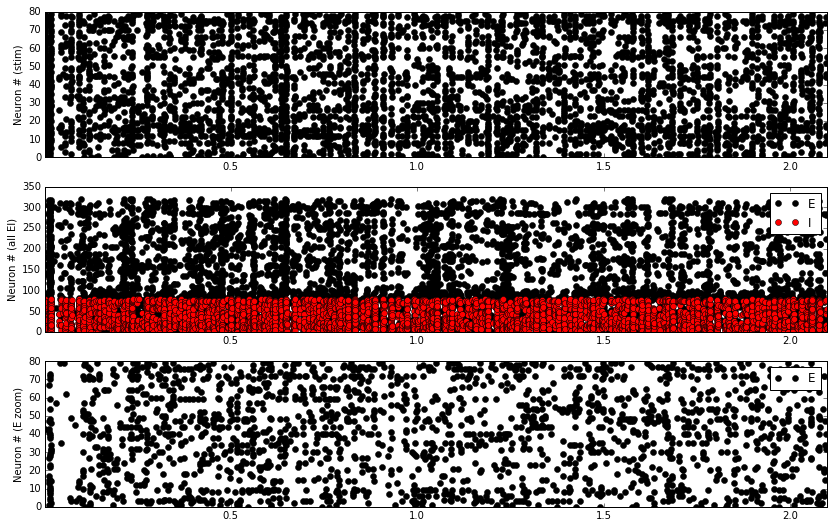

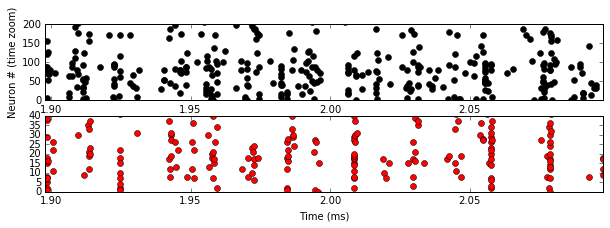

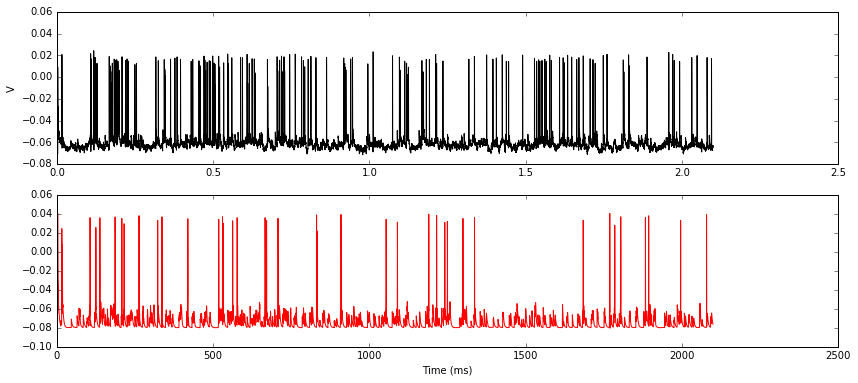

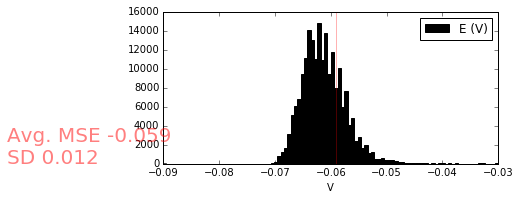

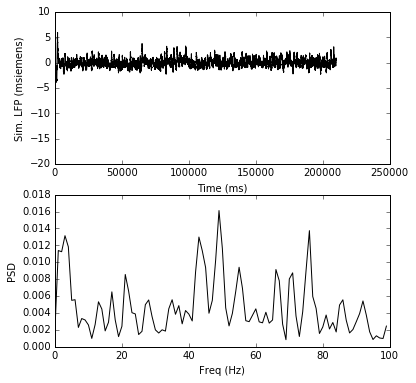

In [83]:
# ------------------------------------------------------------
# Raster full
close()

figure(figsize=(14, 12))
subplot(411)
plot(ts_stim, ns_stim, 'o', label='', color='k')
xlim(t_min, t_max)
ylabel("Neuron # (stim)")
legend()

subplot(412)
plot(ts_e, ns_e, 'o', label='E', color='k')
plot(ts_i, ns_i, 'o', label='I', color='r')
xlim(t_min, t_max)
ylabel("Neuron # (all EI)")
legend()

# N stim zoon
N_stim = ns_stim.max()
subplot(413)
m_e = ns_e <= N_stim
m_i = ns_i <= N_stim
plot(ts_e[m_e], ns_e[m_e], 'o', label='E', color='k')
# plot(ts_i[m_i], ns_i[m_i], 'o', label='I', color='r')
xlim(t_min, t_max)
ylabel("Neuron # (E zoom)")
legend()

# Raster zoom
figure(figsize=(10, 3))
subplot(211)
plot(ts_e, ns_e, 'o', color='k')
ylabel("Neuron # (time zoom)")
ylim(0, 200)
xlim(t_max - .200, t_max)
legend()

subplot(212)
plot(ts_i, ns_i, 'o', color='r')
xlabel("Time (ms)")
ylim(0, 40)
xlim(t_max - .200, t_max)

# ------------------------------------------------------------
# V 
tn = 2000
figure(figsize=(14, 6))
subplot(211)
plot(v_times, v_e, color='k')
# ylim(-90, -50)
ylabel("V")
legend()

subplot(212)
plot(v_times/ms, v_i, color='r')
xlabel("Time (ms)")
legend()

# V hist
figure(figsize=(6,6))

subplot(211)
M = np.round(np.mean(v_e[tn:]), 3)
SD = np.round(np.std(v_e[tn:]), 3)
hist(v_e[tn:], label='E (V)', color='k', bins=100, range=(-90e-3, -30e-3))
plt.axvline(x=M, color="red", alpha=0.3)
plt.text(2*M, 0, "Avg. MSE {}\nSD {}".format(M, SD), color="r", fontsize=20, alpha=0.5)
xlabel("V")
legend()

# ------------------------------------------------------------
figure(figsize=(6,6))
subplot(211)
plot(lfp, color='k',  label='LFP')
xlabel("Time (ms)")
ylabel("Sim. LFP (msiemens)")

subplot(212)
fs, spec = util.create_psd(lfp, 100000.)
plot(fs[fs < 100], spec[fs < 100], color='k')
xlabel("Freq (Hz)") 
ylabel("PSD")